In [1]:
import pandas as pd
import numpy as np
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt

C:\Users\madst\AppData\Local\Temp\ipykernel_27632\2365528467.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gdp['Time'] = pd.to_datetime(gdp['Time'])


Data types in 'indu' dataframe:
Time     datetime64[ns]
Value             int64
dtype: object

Data types in 'cons' dataframe:
Time     datetime64[ns]
Value           float64
dtype: object

Data types in 'gdp' dataframe:
Time     datetime64[ns]
Value           float64
dtype: object


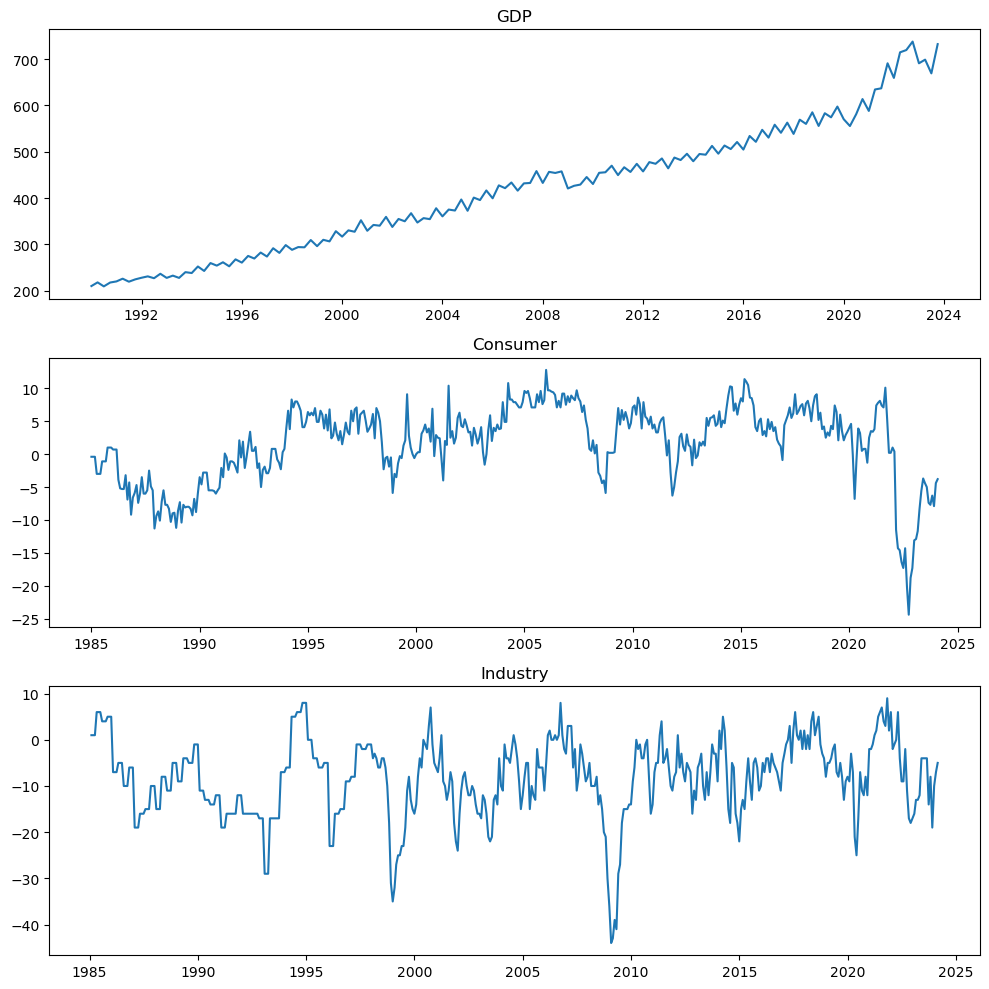

Value           float64
Time     datetime64[ns]
dtype: object
Value           float64
Time     datetime64[ns]
dtype: object


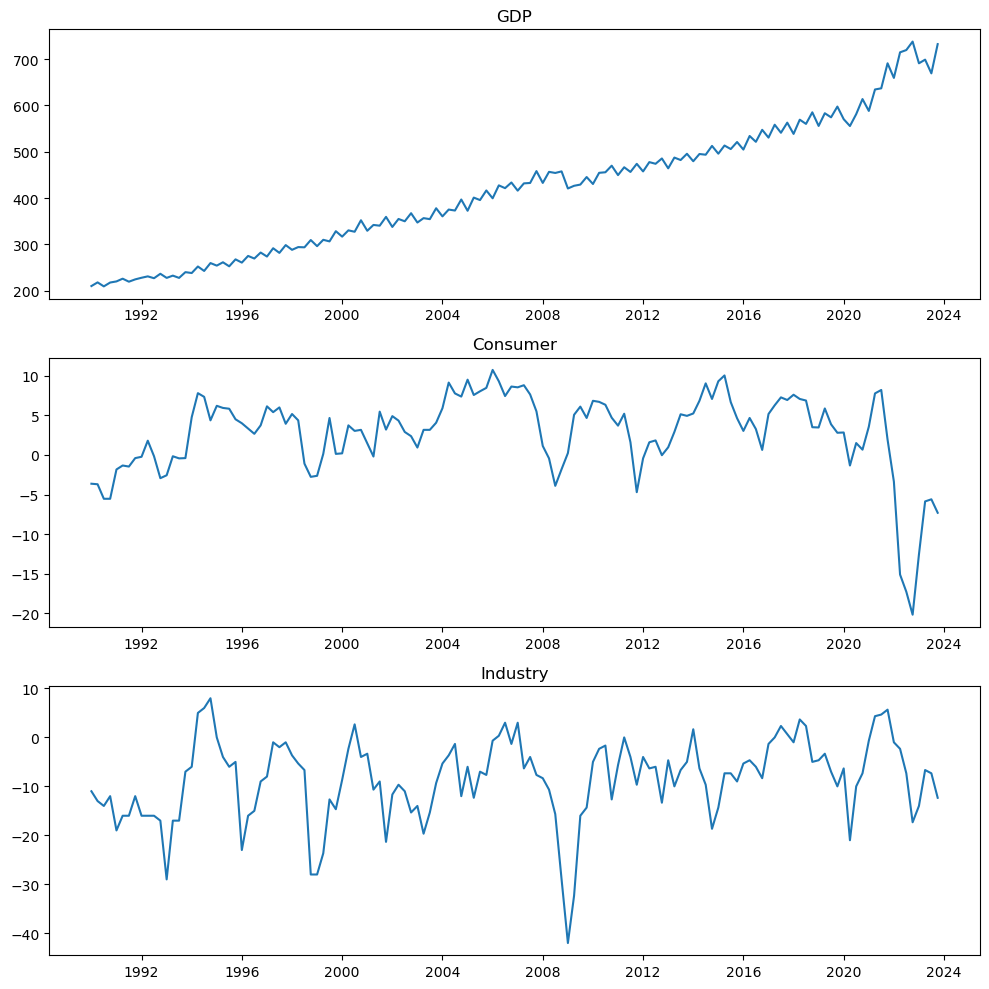

In [2]:
# Run the stored data from the Data_Preparation.ipynb
%run Data_Preparation.ipynb

In [3]:
#Using the period 1990-2020 for training and 2021-2023 for testing
indu_train = indu[(indu['Time'] >= '1990-01-01') & (indu['Time'] < '2021-01-01')]
cons_train = cons[(cons['Time'] >= '1990-01-01') & (cons['Time'] < '2021-01-01')]
gdp_train = gdp[(gdp['Time'] >= '1990-01-01') & (gdp['Time'] < '2021-01-01')]

indu_test = indu[(indu['Time'] >= '2021-01-01') & (indu['Time'] < '2024-01-01')]
cons_test = cons[(cons['Time'] >= '2021-01-01') & (cons['Time'] < '2024-01-01')]
gdp_test = gdp[(gdp['Time'] >= '2021-01-01') & (gdp['Time'] < '2024-01-01')]

In [4]:
from statsmodels.tsa.stattools import adfuller

# Perform augmented Dickey-Fuller test for gdp
adf_gdp = adfuller(gdp_train['Value'])
print("Augmented Dickey-Fuller test for GDP:")
print("ADF Statistic:", adf_gdp[0])
print("p-value:", adf_gdp[1])
print("Critical Values:")
for key, value in adf_gdp[4].items():
    print(key, ":", value)

# Perform augmented Dickey-Fuller test for indu
adf_indu = adfuller(indu_train['Value'])
print("\nAugmented Dickey-Fuller test for Industry:")
print("ADF Statistic:", adf_indu[0])
print("p-value:", adf_indu[1])
print("Critical Values:")
for key, value in adf_indu[4].items():
    print(key, ":", value)

# Perform augmented Dickey-Fuller test for cons
adf_cons = adfuller(cons_train['Value'])
print("\nAugmented Dickey-Fuller test for Consumer:")
print("ADF Statistic:", adf_cons[0])
print("p-value:", adf_cons[1])
print("Critical Values:")
for key, value in adf_cons[4].items():
    print(key, ":", value)

#GDP is not stationary, but Industry and Consumption is. We will difference all variables to make it stationary.

Augmented Dickey-Fuller test for GDP:
ADF Statistic: 0.12647098271672272
p-value: 0.9678226063675385
Critical Values:
1% : -3.4912451337340342
5% : -2.8881954545454547
10% : -2.5809876033057852

Augmented Dickey-Fuller test for Industry:
ADF Statistic: -4.255942897714196
p-value: 0.000529064782355817
Critical Values:
1% : -3.4870216863700767
5% : -2.8863625166643136
10% : -2.580009026141913

Augmented Dickey-Fuller test for Consumer:
ADF Statistic: -3.271426184229505
p-value: 0.01620505028875171
Critical Values:
1% : -3.4885349695076844
5% : -2.887019521656941
10% : -2.5803597920604915


In [5]:
#Differencing the data for both training and testing
gdp_train['diff'] = gdp_train['Value'].diff()
cons_train['diff'] = cons_train['Value'].diff()
indu_train['diff'] = indu_train['Value'].diff()

gdp_test['diff'] = gdp_test['Value'].diff()
cons_test['diff'] = cons_test['Value'].diff()
indu_test['diff'] = indu_test['Value'].diff()

C:\Users\madst\AppData\Local\Temp\ipykernel_27632\2592117011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_train['diff'] = gdp_train['Value'].diff()
C:\Users\madst\AppData\Local\Temp\ipykernel_27632\2592117011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cons_train['diff'] = cons_train['Value'].diff()
C:\Users\madst\AppData\Local\Temp\ipykernel_27632\2592117011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [6]:
#Checking if the differencing made the data stationary
# Perform augmented Dickey-Fuller test for gdp
adf_gdp = adfuller(gdp_train['diff'].dropna())
print("Augmented Dickey-Fuller test for GDP:")
print("ADF Statistic:", adf_gdp[0])
print("p-value:", adf_gdp[1])
print("Critical Values:")
for key, value in adf_gdp[4].items():
    print(key, ":", value)

# Perform augmented Dickey-Fuller test for indu
adf_indu = adfuller(indu_train['diff'].dropna())
print("\nAugmented Dickey-Fuller test for Industry:")
print("ADF Statistic:", adf_indu[0])
print("p-value:", adf_indu[1])
print("Critical Values:")
for key, value in adf_indu[4].items():
    print(key, ":", value)

# Perform augmented Dickey-Fuller test for cons
adf_cons = adfuller(cons_train['diff'].dropna())
print("\nAugmented Dickey-Fuller test for Consumer:")
print("ADF Statistic:", adf_cons[0])
print("p-value:", adf_cons[1])
print("Critical Values:")
for key, value in adf_cons[4].items():
    print(key, ":", value)

#The variables are now stationary.

Augmented Dickey-Fuller test for GDP:
ADF Statistic: -3.9146553912549416
p-value: 0.0019296000808775701
Critical Values:
1% : -3.4912451337340342
5% : -2.8881954545454547
10% : -2.5809876033057852

Augmented Dickey-Fuller test for Industry:
ADF Statistic: -5.811348767601427
p-value: 4.3939421961156723e-07
Critical Values:
1% : -3.489057523907491
5% : -2.887246327182993
10% : -2.5804808802708528

Augmented Dickey-Fuller test for Consumer:
ADF Statistic: -6.244239346560705
p-value: 4.617446824310104e-08
Critical Values:
1% : -3.4880216384691867
5% : -2.8867966864160075
10% : -2.5802408234244947


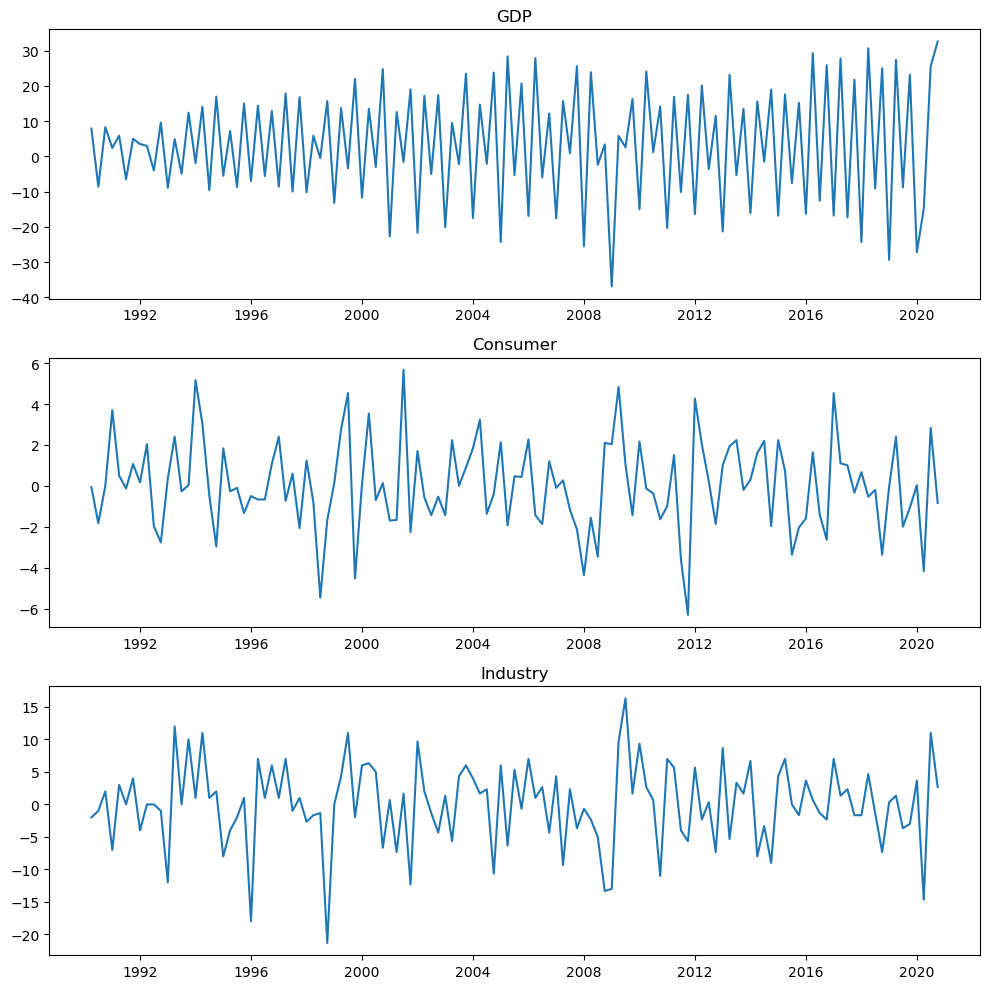

In [7]:
#Plotting the differenced data
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Plotting gdp
axs[0].plot(gdp_train['Time'], gdp_train['diff'])
axs[0].set_title('GDP')

# Plotting cons
axs[1].plot(cons_train['Time'], cons_train['diff'])
axs[1].set_title('Consumer')

# Plotting indu
axs[2].plot(indu_train['Time'], indu_train['diff'])
axs[2].set_title('Industry')

# Adjusting the layout
plt.tight_layout()

# Display the plots
plt.show()

In [8]:
print(gdp_train)
print(cons_train)
print(indu_train)


          Time  Value  diff
0   1990-01-01  210.2   NaN
1   1990-04-01  218.1   7.9
2   1990-07-01  209.5  -8.6
3   1990-10-01  217.8   8.3
4   1991-01-01  220.2   2.4
..         ...    ...   ...
119 2019-10-01  597.6  23.2
120 2020-01-01  570.4 -27.2
121 2020-04-01  555.6 -14.8
122 2020-07-01  581.2  25.6
123 2020-10-01  613.8  32.6

[124 rows x 3 columns]
        Value       Time      diff
20  -3.633333 1990-01-01       NaN
21  -3.700000 1990-04-01 -0.066667
22  -5.533333 1990-07-01 -1.833333
23  -5.533333 1990-10-01  0.000000
24  -1.833333 1991-01-01  3.700000
..        ...        ...       ...
139  2.800000 2019-10-01 -1.066667
140  2.833333 2020-01-01  0.033333
141 -1.333333 2020-04-01 -4.166667
142  1.500000 2020-07-01  2.833333
143  0.666667 2020-10-01 -0.833333

[124 rows x 3 columns]
         Value       Time       diff
20  -11.000000 1990-01-01        NaN
21  -13.000000 1990-04-01  -2.000000
22  -14.000000 1990-07-01  -1.000000
23  -12.000000 1990-10-01   2.000000
24  -19.000

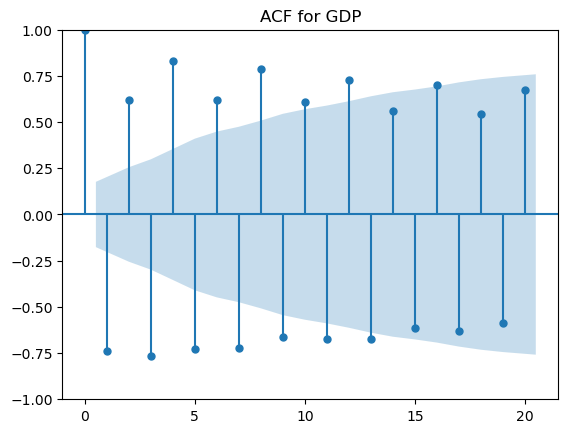

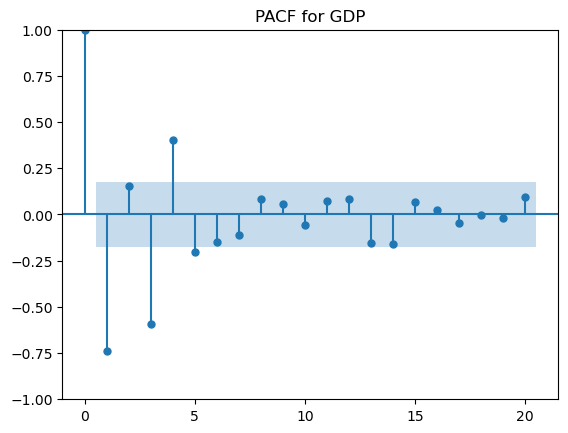

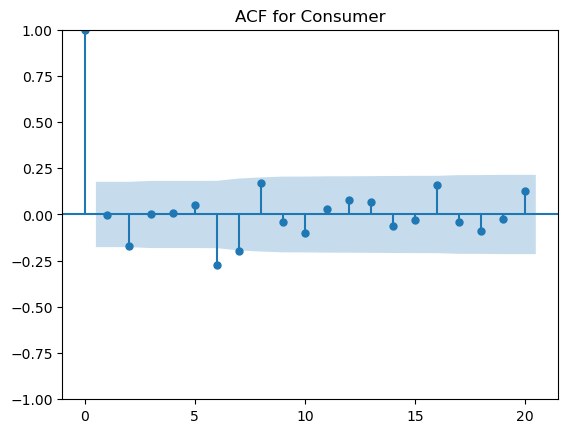

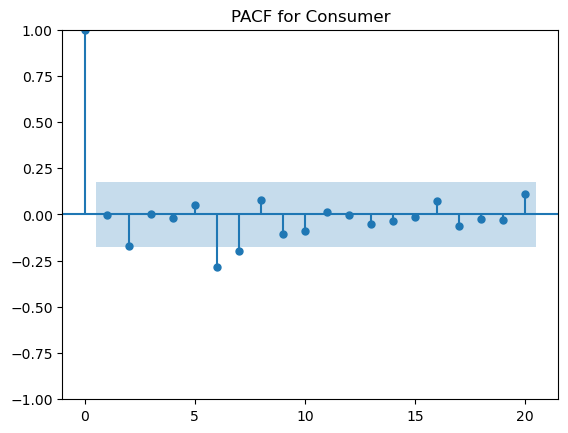

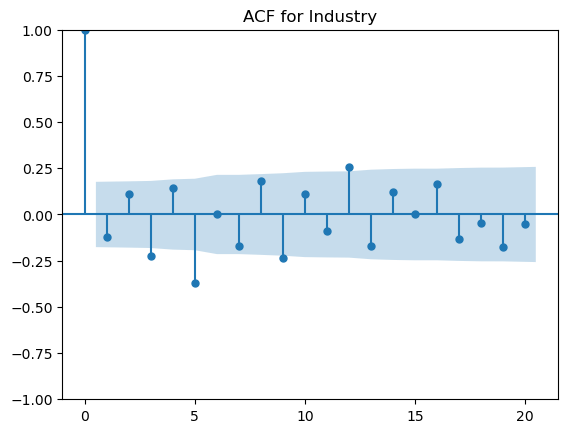

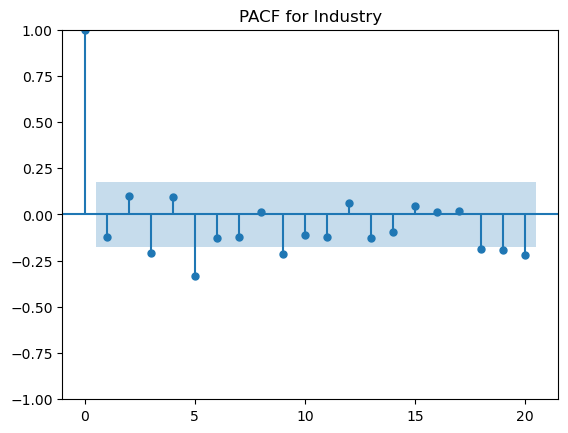

In [9]:
#Checking the data's acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF for gdp
plot_acf(gdp_train['diff'].dropna(), lags=20)
plt.title('ACF for GDP')
plt.show()

# Plot the PACF for gdp
plot_pacf(gdp_train['diff'].dropna(), lags=20)
plt.title('PACF for GDP')
plt.show()

# Plot the ACF for cons
plot_acf(cons_train['diff'].dropna(), lags=20) 
plt.title('ACF for Consumer')
plt.show()

# Plot the PACF for cons
plot_pacf(cons_train['diff'].dropna(), lags=20)
plt.title('PACF for Consumer')
plt.show()

# Plot the ACF for indu
plot_acf(indu_train['diff'].dropna(), lags=20)
plt.title('ACF for Industry')
plt.show()

# Plot the PACF for indu
plot_pacf(indu_train['diff'].dropna(), lags=20)
plt.title('PACF for Industry')
plt.show()

#gdp shows significant lags until around 12.
#cons do not show significant lags.
#indu do not show significant lags.

In [10]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

#Resetting the index
gdp_train.reset_index(drop=True, inplace=True)
indu_train.reset_index(drop=True, inplace=True)
cons_train.reset_index(drop=True, inplace=True)

# Combine the explanatory variables into a single DataFrame
exog = pd.concat([indu_train['Value'].dropna() , cons_train['Value'].dropna()], axis=1)
exog.columns = ['Value_indu', 'Value_cons']

# Define the range of values for p, d, and q
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

# Create a list of all possible combinations of p, d, and q
param_combinations = list(itertools.product(p_values, d_values, q_values))

# Initialize variables to store the best model and its AIC value
best_model = None
best_aic = float('inf')

# Iterate over all combinations of p, d, and q
for params in param_combinations:
    try:
        # Create the ARIMA model with the current parameters
        model = ARIMA(gdp_train['Value'].dropna(), order=params, exog=exog)
        
        # Fit the model
        model_fit = model.fit()
        
        # Get the AIC value of the model
        aic = model_fit.aic
        
        # Check if the current model has a lower AIC value than the best model so far
        if aic < best_aic:
            best_model = model_fit
            best_aic = aic
    except:
        continue

# Print the summary of the best model
print(best_model.summary())


c:\Users\madst\anaconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\madst\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\madst\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\madst\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters fou

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  124
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -440.195
Date:                Sun, 10 Mar 2024   AIC                            892.390
Time:                        15:48:08   BIC                            909.214
Sample:                             0   HQIC                           899.223
                                - 124                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Value_indu     0.3475      0.130      2.674      0.008       0.093       0.602
Value_cons    -0.4572      0.397     -1.152      0.249      -1.235       0.320
ar.L1         -0.9973      0.006   -156.930      0.0

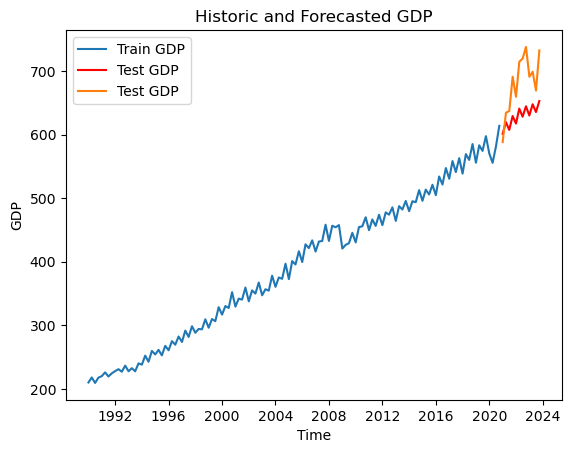

In [11]:
# Forecast 12 quarters ahead based on test indu and cons
fut_exog = pd.concat([indu_test['Value'].dropna(), cons_test['Value'].dropna()], axis=1)
fut_exog.columns = ['Value_indu', 'Value_cons']

forecast = model_fit.get_forecast(steps=12, exog=fut_exog.iloc[-12:])

# Get the forecasted values
forecast_values = forecast.predicted_mean

# Define the forecast dates
forecast_dates = pd.date_range(start=gdp_train['Time'].iloc[-1], periods=12, freq='Q')

# Plotting the forecasted values
# Plotting historic GDP and forecasted GDP
plt.plot(gdp_train['Time'], gdp_train['Value'], label='Train GDP')
plt.plot(forecast_dates, forecast_values, color='red', label='Test GDP')
plt.plot(gdp_test['Time'], gdp_test['Value'], label='Test GDP')

# Set the title and labels
plt.title('Historic and Forecasted GDP')
plt.xlabel('Time')
plt.ylabel('GDP')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [12]:
#Comparing the forecasted values with the actual values trough RMSE
# Calculate the RMSE
rmse_value = rmse(gdp_test['Value'], forecast_values)

# Print the RMSE
print("The RMSE is", rmse_value)

#The RMSE is 60.00, which is quite high. This is likely due to the fact that the model is not very good at predicting the GDP in the period 2020 - 2023. This is likely due to the COVID-19 pandemic, which has caused a lot of uncertainty in the economy. The model is not able to capture this uncertainty, and therefore the forecast is not very accurate.

The RMSE is 60.00476147367009
